In [1]:
import netCDF4 as nc
import numpy as np
netL=[]

with nc.Dataset('wrfout_d02_2010-09-21_10:00:00') as f:
    qr=f['QRAIN'][0,:,:,:]
    qc=f['QCLOUD'][0,:,:,:]
    p=f['P'][0,:,:,:]+f['PB'][0,:,:,:]
    t=f['T'][0,:,:,:]+300
    tk=t*(p/100000)**(287/1004)
    rho_air=p/(287*tk)

with nc.Dataset('auxhist2_d02_2010-09-21_12:00:00') as f:
    for i in range(43):
        netb=f['ffc%2.2idr'%(i+1)][:]
        netL.append(netb[0,:,:,:])

netL=np.array(netL).T

In [3]:
print(netL.shape)
import aux2py
aux2py.set_sdsu_param(43)
q_sbm,n_sbm,dm3d=aux2py.aux2nc_liq(netL,rho_air.T) # this outputs the liquid water content in g/m^3 and 
# the unnormalized mean diameter, i.e. mass*diameter
# n_sbm is the number concentration in m^-3 per bin
a=np.nonzero(q_sbm>1e-4)
dm3d[a]/=q_sbm[a] # this is the mean diameter in cm 
b=np.nonzero(q_sbm<1e-4)
dm3d[b]=0


(399, 399, 60, 43)


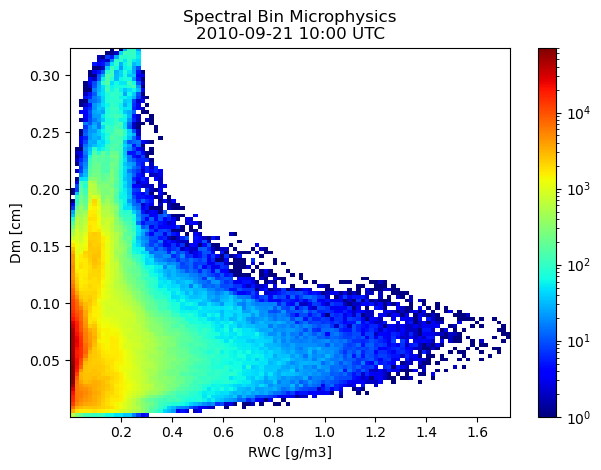

In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors
a=np.nonzero(q_sbm>1e-4)
h2d=plt.hist2d(q_sbm[a],dm3d[a],bins=100,norm=matplotlib.colors.LogNorm(),cmap='jet')
plt.colorbar(h2d[3])
plt.xlabel('RWC [g/m3]')
plt.ylabel('Dm [cm]')
plt.title('Spectral Bin Microphysics\n2010-09-21 10:00 UTC') 
plt.tight_layout()
plt.savefig('sbm_0921_12:00.png',dpi=300)

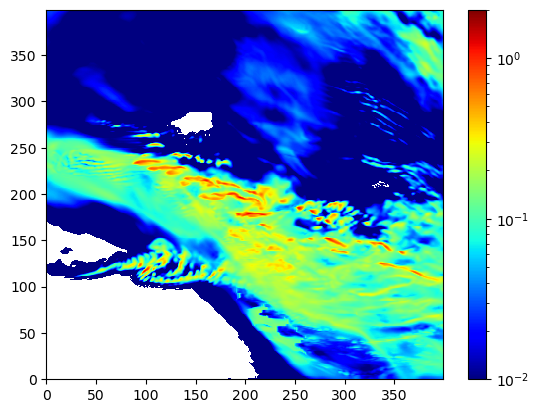

In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors

plt.pcolormesh(q_sbm[:,:,0],cmap='jet',norm=matplotlib.colors.LogNorm(vmin=1e-2,vmax=2e0))
plt.colorbar()